Here we will test out various methods for classification and choose the best of them. The dataset used contains data about the properties of a house for sale and the goal is to predict whether it will be sold within the next three months or not.

#### Importing the required modules and loading the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
df = pd.read_csv('Houseprice.csv')
df.head(20)

,price,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks,Sold
0,24.0,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,YES,5.480,11.1920,River,23,YES,0.049347,0
1,21.6,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,NO,7.332,12.1728,Lake,42,YES,0.046146,1
2,34.7,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,101.1200,None,38,YES,0.045764,0
3,33.4,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,YES,9.268,11.2672,Lake,45,YES,0.047151,0
4,36.2,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,NO,8.824,11.2896,Lake,55,YES,0.039474,0
5,28.7,32.18,0.458,6.430,58.7,6.22,5.80,6.23,5.99,21.3,5.21,YES,7.174,14.2296,None,53,YES,0.045910,1
6,22.9,37.87,0.524,6.012,66.6,5.87,5.47,5.70,5.20,24.8,12.43,YES,6.958,12.1832,River,41,YES,0.052170,1
7,22.1,37.87,0.524,6.172,96.1,6.04,5.85,6.25,5.66,24.8,19.15,NO,5.842,12.1768,Lake,56,YES,0.057075,1
8,16.5,37.87,0.524,5.631,100.0,6.18,5.85,6.30,6.00,24.8,29.93,YES,5.930,12.1320,None,55,YES,0.056302,0
9,18.9,37.87,0.524,6.004,85.9,6.67,6.55,6.85,6.29,24.8,17.10,YES,9.478,14.1512,River,45,YES,0.050727,0


#### Preprocessing

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        506 non-null    float64
 1   resid_area   506 non-null    float64
 2   air_qual     506 non-null    float64
 3   room_num     506 non-null    float64
 4   age          506 non-null    float64
 5   dist1        506 non-null    float64
 6   dist2        506 non-null    float64
 7   dist3        506 non-null    float64
 8   dist4        506 non-null    float64
 9   teachers     506 non-null    float64
 10  poor_prop    506 non-null    float64
 11  airport      506 non-null    object 
 12  n_hos_beds   498 non-null    float64
 13  n_hot_rooms  506 non-null    float64
 14  waterbody    506 non-null    object 
 15  rainfall     506 non-null    int64  
 16  bus_ter      506 non-null    object 
 17  parks        506 non-null    float64
 18  Sold         506 non-null    int64  
dtypes: float

Missing values observed in the 'n_hos_beds' column. The other predictor variables do not have any null values.

In [4]:
df.n_hos_beds.describe()

count    498.000000
mean       7.899767
std        1.476683
min        5.268000
25%        6.634500
50%        7.999000
75%        9.088000
max       10.876000
Name: n_hos_beds, dtype: float64

The data for this does not seem to be skewered to one side. So mean can be used to fill the missing values

In [5]:
df.n_hos_beds.fillna(np.mean(df.n_hos_beds), inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        506 non-null    float64
 1   resid_area   506 non-null    float64
 2   air_qual     506 non-null    float64
 3   room_num     506 non-null    float64
 4   age          506 non-null    float64
 5   dist1        506 non-null    float64
 6   dist2        506 non-null    float64
 7   dist3        506 non-null    float64
 8   dist4        506 non-null    float64
 9   teachers     506 non-null    float64
 10  poor_prop    506 non-null    float64
 11  airport      506 non-null    object 
 12  n_hos_beds   506 non-null    float64
 13  n_hot_rooms  506 non-null    float64
 14  waterbody    506 non-null    object 
 15  rainfall     506 non-null    int64  
 16  bus_ter      506 non-null    object 
 17  parks        506 non-null    float64
 18  Sold         506 non-null    int64  
dtypes: float

##### Missing values are filled

#### Checking for outliers by observing the statistical summary of the dataset

In [7]:
df.describe()

,price,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,Sold
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,22.528854,41.136779,0.554695,6.284634,68.574901,3.971996,3.628775,3.960672,3.618972,21.544466,12.653063,7.899767,13.041605,39.181818,0.054454,0.454545
std,9.182176,6.860353,0.115878,0.702617,28.148861,2.108532,2.108580,2.119797,2.099203,2.164946,7.141062,1.464939,5.238957,12.513697,0.010632,0.498422
min,5.000000,30.460000,0.385000,3.561000,2.900000,1.130000,0.920000,1.150000,0.730000,18.000000,1.730000,5.268000,10.057600,3.000000,0.033292,0.000000
25%,17.025000,35.190000,0.449000,5.885500,45.025000,2.270000,1.940000,2.232500,1.940000,19.800000,6.950000,6.659000,11.189800,28.000000,0.046464,0.000000
50%,21.200000,39.690000,0.538000,6.208500,77.500000,3.385000,3.010000,3.375000,3.070000,20.950000,11.360000,7.963000,12.720000,39.000000,0.053507,0.000000
75%,25.000000,48.100000,0.624000,6.623500,94.075000,5.367500,4.992500,5.407500,4.985000,22.600000,16.955000,9.076000,14.170800,50.000000,0.061397,1.000000
max,50.000000,57.740000,0.871000,8.780000,100.000000,12.320000,11.930000,12.320000,11.940000,27.400000,37.970000,10.876000,101.120000,60.000000,0.086711,1.000000


Notice the large difference in max value and 75% value indicating an outlier on the upper side of the n_hot_rooms data points. Similarly a large difference in min value and 25% value indicating an outlier on the lower side of rainfall data point.

#### Using scattter plots to confirm this indication

<AxesSubplot:xlabel='n_hot_rooms', ylabel='Sold'>

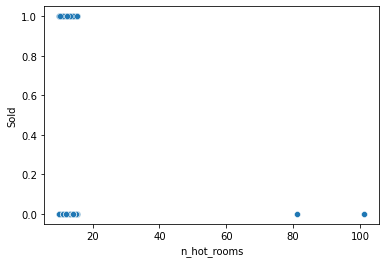

In [8]:
sn.scatterplot(x='n_hot_rooms', y='Sold', data=df)

Outliers can be observed in this sctterplot on the right side. Removing these outliers is necessary as they increase the variance of the data causing low prediction accuracy.
#### Using capping method to treat these outliers

In [9]:
df.n_hot_rooms[df.n_hot_rooms > 3 * np.percentile(df.n_hot_rooms, [99])[0]] = 3 * np.percentile(df.n_hot_rooms, [99])[0]

<ipython-input-9-ad7a6f8ff2ca>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.n_hot_rooms[df.n_hot_rooms > 3 * np.percentile(df.n_hot_rooms, [99])[0]] = 3 * np.percentile(df.n_hot_rooms, [99])[0]


Here I used the upper limit as 3 times the 99% value to cap the data.
Let's see if the outliers are treated

<AxesSubplot:xlabel='n_hot_rooms', ylabel='Sold'>

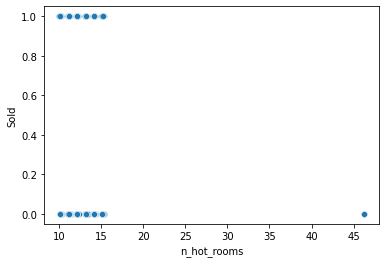

In [10]:
sn.scatterplot(x='n_hot_rooms', y='Sold', data=df)

Outliers are in acceptable range now where they won't increase the variance.
#### checking the outliers in rainfall series

<AxesSubplot:xlabel='rainfall', ylabel='Sold'>

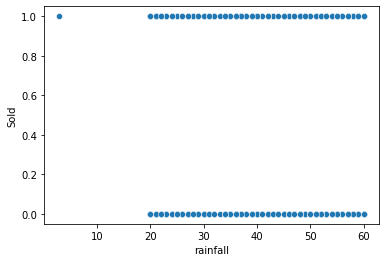

In [11]:
sn.scatterplot(x='rainfall', y='Sold', data=df)

Outlier observed on the lower side as suspected.
#### Using flooring to treat this outlier

In [12]:
df.rainfall[df.rainfall < 0.3 * np.percentile(df.rainfall, [1])[0]] = 0.3 * np.percentile(df.rainfall, [1])[0]

<ipython-input-12-7dde76b0a168>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rainfall[df.rainfall < 0.3 * np.percentile(df.rainfall, [1])[0]] = 0.3 * np.percentile(df.rainfall, [1])[0]


<AxesSubplot:xlabel='rainfall', ylabel='Sold'>

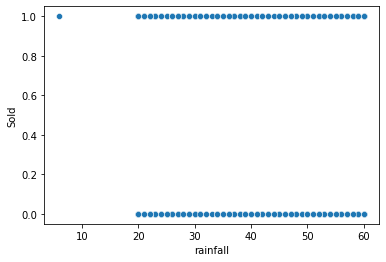

In [13]:
sn.scatterplot(x='rainfall', y='Sold', data=df)

It has been moved to the acceptable range
#### Examining the categorical variables

<AxesSubplot:xlabel='airport', ylabel='count'>

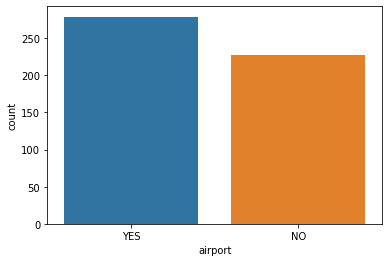

In [14]:
sn.countplot(x='airport', data=df)

<AxesSubplot:xlabel='waterbody', ylabel='count'>

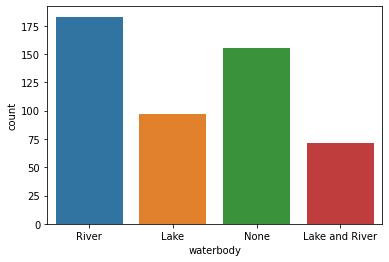

In [15]:
sn.countplot(x='waterbody', data=df)

<AxesSubplot:xlabel='bus_ter', ylabel='count'>

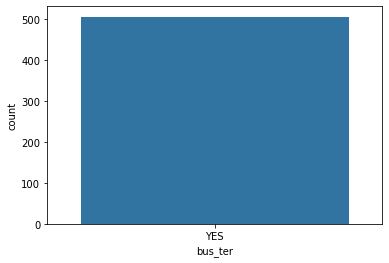

In [16]:
sn.countplot(x='bus_ter', data=df)

Here bus_ter has only one class. So change in outcome is not affected by this predictor according to this dataset.
Now, there may be some bias while selecting the data for the sample but we can assume that this variable doesn't make that much impact even in the population.
#### Dropping the variable

In [17]:
df.drop('bus_ter', axis=1, inplace=True)

#### Creating dummy variables for the categorical data
Now this may not be necessary for classification models like decision tree but to compare them with the linear models, it is necessary.

In [18]:
pd.get_dummies(df, drop_first=True)

,price,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,Sold,airport_YES,waterbody_Lake and River,waterbody_None,waterbody_River
0,24.0,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,5.480,11.19200,23,0.049347,0,1,0,0,1
1,21.6,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,7.332,12.17280,42,0.046146,1,0,0,0,0
2,34.7,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,7.394,46.19856,38,0.045764,0,0,0,1,0
3,33.4,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,9.268,11.26720,45,0.047151,0,1,0,0,0
4,36.2,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,8.824,11.28960,55,0.039474,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,22.4,41.93,0.573,6.593,69.1,2.64,2.45,2.76,2.06,19.0,9.67,9.348,12.17920,27,0.056006,1,0,1,0,0
502,20.6,41.93,0.573,6.120,76.7,2.44,2.11,2.46,2.14,19.0,9.08,6.612,13.16480,20,0.059903,1,1,1,0,0
503,23.9,41.93,0.573,6.976,91.0,2.34,2.06,2.29,1.98,19.0,5.64,5.478,12.19120,31,0.057572,1,0,0,1,0
504,22.0,41.93,0.573,6.794,89.3,2.54,2.31,2.40,2.31,19.0,6.48,7.940,15.17600,47,0.060694,1,1,0,1,0


#### Separating the dependent and independent variables

In [19]:
X = pd.get_dummies(df, drop_first=True).drop('Sold', axis=1)

In [20]:
X

,price,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,airport_YES,waterbody_Lake and River,waterbody_None,waterbody_River
0,24.0,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,5.480,11.19200,23,0.049347,1,0,0,1
1,21.6,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,7.332,12.17280,42,0.046146,0,0,0,0
2,34.7,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,7.394,46.19856,38,0.045764,0,0,1,0
3,33.4,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,9.268,11.26720,45,0.047151,1,0,0,0
4,36.2,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,8.824,11.28960,55,0.039474,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,22.4,41.93,0.573,6.593,69.1,2.64,2.45,2.76,2.06,19.0,9.67,9.348,12.17920,27,0.056006,0,1,0,0
502,20.6,41.93,0.573,6.120,76.7,2.44,2.11,2.46,2.14,19.0,9.08,6.612,13.16480,20,0.059903,1,1,0,0
503,23.9,41.93,0.573,6.976,91.0,2.34,2.06,2.29,1.98,19.0,5.64,5.478,12.19120,31,0.057572,0,0,1,0
504,22.0,41.93,0.573,6.794,89.3,2.54,2.31,2.40,2.31,19.0,6.48,7.940,15.17600,47,0.060694,1,0,1,0


In [21]:
Y = df.Sold

#### Checking for correlations in X
Correlations in data occur when one predictor variable is dependent on other. This decreases the model accuracy.

In [22]:
df.corr()

,price,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,Sold
price,1.000000,-0.484754,-0.429300,0.696304,-0.377999,0.251355,0.249459,0.246650,0.248200,0.505655,-0.740836,0.108880,0.017007,-0.047200,-0.391574,-0.154698
resid_area,-0.484754,1.000000,0.763651,-0.391676,0.644779,-0.706481,-0.707956,-0.707566,-0.705819,-0.383248,0.603800,0.005799,-0.003761,0.055845,0.707635,0.024404
air_qual,-0.429300,0.763651,1.000000,-0.302188,0.731470,-0.768589,-0.769724,-0.769157,-0.764873,-0.188933,0.590879,-0.049553,0.007238,0.091956,0.915544,-0.004017
room_num,0.696304,-0.391676,-0.302188,1.000000,-0.240265,0.208464,0.203981,0.201907,0.205397,0.355501,-0.613808,0.032009,0.014583,-0.064718,-0.282817,0.027148
age,-0.377999,0.644779,0.731470,-0.240265,1.000000,-0.746904,-0.746493,-0.747021,-0.746707,-0.261515,0.602339,-0.021012,0.013918,0.074684,0.673850,-0.016291
dist1,0.251355,-0.706481,-0.768589,0.208464,-0.746904,1.000000,0.997905,0.997735,0.994073,0.232834,-0.498823,-0.030365,-0.025398,-0.036812,-0.706319,-0.035309
dist2,0.249459,-0.707956,-0.769724,0.203981,-0.746493,0.997905,1.000000,0.998097,0.994003,0.233707,-0.495693,-0.031071,-0.021263,-0.037990,-0.708237,-0.040356
dist3,0.246650,-0.707566,-0.769157,0.201907,-0.747021,0.997735,0.998097,1.000000,0.994126,0.233588,-0.494290,-0.028315,-0.019994,-0.041475,-0.709346,-0.035768
dist4,0.248200,-0.705819,-0.764873,0.205397,-0.746707,0.994073,0.994003,0.994126,1.000000,0.228256,-0.496084,-0.021534,-0.016003,-0.032596,-0.703508,-0.043612
teachers,0.505655,-0.383248,-0.188933,0.355501,-0.261515,0.232834,0.233707,0.233588,0.228256,1.000000,-0.374044,-0.008056,-0.037007,-0.045928,-0.187004,0.042525


Here the dist1,dist2,dist3,dist4 are the distance from the nearest office area of the city. These are highly correlated with each other. To remove the correlation we can take the avg distance.

In [23]:
X['avg_dist'] = (X.dist1 + X.dist2 + X.dist3 + X.dist4)/4

In [24]:
X.drop(['dist1', 'dist2', 'dist3', 'dist4'], axis=1, inplace=True)
X

,price,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,airport_YES,waterbody_Lake and River,waterbody_None,waterbody_River,avg_dist
0,24.0,32.31,0.538,6.575,65.2,24.7,4.98,5.480,11.19200,23,0.049347,1,0,0,1,4.0875
1,21.6,37.07,0.469,6.421,78.9,22.2,9.14,7.332,12.17280,42,0.046146,0,0,0,0,4.9675
2,34.7,37.07,0.469,7.185,61.1,22.2,4.03,7.394,46.19856,38,0.045764,0,0,1,0,4.9675
3,33.4,32.18,0.458,6.998,45.8,21.3,2.94,9.268,11.26720,45,0.047151,1,0,0,0,6.0650
4,36.2,32.18,0.458,7.147,54.2,21.3,5.33,8.824,11.28960,55,0.039474,0,0,0,0,6.0625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,22.4,41.93,0.573,6.593,69.1,19.0,9.67,9.348,12.17920,27,0.056006,0,1,0,0,2.4775
502,20.6,41.93,0.573,6.120,76.7,19.0,9.08,6.612,13.16480,20,0.059903,1,1,0,0,2.2875
503,23.9,41.93,0.573,6.976,91.0,19.0,5.64,5.478,12.19120,31,0.057572,0,0,1,0,2.1675
504,22.0,41.93,0.573,6.794,89.3,19.0,6.48,7.940,15.17600,47,0.060694,1,0,1,0,2.3900


The predictor variable 'parks' is highly correlated to multiple variables. Hence, dropping it would increase accuracy.

In [25]:
X.drop(['parks'], axis=1, inplace=True)

Now let us begin testing the classification models in increasing order of model complexity.
#### First a simple linear regression model to predict the values of outcome and assigning a class based on a decision boundary

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
reg_clf = LinearRegression()

#### splitting the data into testing and training sets

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

#### Fitting our model to the training data

In [30]:
reg_clf.fit(X_train, Y_train)

LinearRegression()

In [31]:
reg_clf.predict(X_test)

array([-0.28639313,  0.3572571 ,  0.51682867,  0.51401203,  0.44972009,
        0.35848544,  0.37021549,  0.5868103 ,  0.3714806 ,  0.58256158,
        0.46340599,  0.54627829,  0.69021691,  0.39252149,  0.27201738,
        0.50943533,  0.53254423,  0.44022839,  0.32473361,  0.54857968,
        0.16917457,  0.3172562 ,  0.49635355,  0.34189113,  0.20632464,
        0.18194084,  0.22978915,  0.70133285,  0.79228524, -0.06727611,
        0.51057949,  0.5481461 ,  0.47903386,  0.99386059,  0.26858073,
        0.7286473 ,  0.43004895,  0.52394765,  0.22013331,  0.42962128,
        0.63353045,  0.37635081,  0.2151968 ,  0.34938469,  0.92198432,
        0.11590749,  0.53563796,  0.45342094,  0.8016069 ,  0.26369433,
        0.43872058,  0.21542933,  0.37331219,  0.1924294 ,  0.61417095,
        0.41976709,  0.67135971,  0.28179417,  0.5054738 ,  0.74247666,
        0.75950289,  0.52638445,  0.048276  ,  0.60940291,  0.52085457,
        0.49243204,  0.51164114,  0.8134237 ,  0.49126682,  0.51

In [32]:
Y_pred = reg_clf.predict(X_test)

#### Setting up a decision boundary
So our model predicted the values but they do not belong to any class and are quantitative. So a decision boundary needs to be set up so that the outcomes are classified to a certain class when the predicted outcome values are in a certain range.
Here I am choosing a decision boundary in the middle, that is, 0.5.
predicted values higher than 0.5 will be assigned to class 1 else 0

In [33]:
Y_pred[Y_pred > 0.5] = 1

In [34]:
Y_pred[Y_pred <= 0.5] = 0

In [35]:
Y_pred

array([0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1.,
       0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0.,
       0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1.,
       0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1.,
       0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.])

In [36]:
from sklearn.metrics import accuracy_score

In [37]:
accuracy_score(Y_test, Y_pred)

0.6274509803921569

Accuracy score of this model does not seem to be that high. The problem is that the regression model predicts the probability
but the values of some of the predicted values may come above 1 or below 0 as seen in raw predicted values.
This increases the rate of misclassification.

To counter this problem the linear regression equation is put in the logistic function to make a logistic regression model.
#### Logistic regression

In [38]:
from sklearn.linear_model import LogisticRegression
logit_clf = LogisticRegression(max_iter=1000)

#### Fitting to test data

In [39]:
logit_clf.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

In [40]:
logit_clf.predict(X_test)

array([0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1], dtype=int64)

#### accuracy score

In [41]:
accuracy_score(Y_test, logit_clf.predict(X_test))

0.6470588235294118

#### Linear Disciminant analysis
Linear discriminant analysis works best for normally distributed data. It assigns to the class having greatest likelihood.
LDA uses full likelihood based on pr(y|x) known as generative learning, while logistic regression uses the conditional likelihood based on pr(y|x), known as discriminative learning

In [42]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [43]:
lda_clf = LinearDiscriminantAnalysis()

#### Fitting to test data

In [44]:
lda_clf.fit(X_train, Y_train)

LinearDiscriminantAnalysis()

In [45]:
lda_clf.predict(X_test)

array([0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1], dtype=int64)

#### accuracy score

In [46]:
accuracy_score(Y_test, lda_clf.predict(X_test))

0.6274509803921569

The accuracy decreased indicating that the assumption that the data is normally distributed is not true which results in a poorly fitted data decreasing the accuracy.

#### K Nearest Neighbor Classifier
This classifier finds the K nearest data points in the training set from a certain point and estimates the probability by comparing the ratio of each class to obtain a decision boundary.
Since it compares data points, the whole training and testing set need to be standardized.
##### Standardization

In [47]:
from sklearn.preprocessing import StandardScaler

In [48]:
X_train_s = StandardScaler().fit(X_train).transform(X_train)

In [49]:
X_test_s = StandardScaler().fit(X_train).transform(X_test)

Standardized data

In [50]:
X_test_s

array([[ 0.12641518, -0.10289916, -0.58254587, ...,  1.51147373,
        -0.75225758, -0.0906532 ],
       [ 1.32533244, -1.20339961, -1.11113078, ..., -0.66160594,
         1.3293319 ,  0.75831475],
       [-0.2161326 , -0.78422993, -1.0851348 , ..., -0.66160594,
         1.3293319 ,  2.00073544],
       ...,
       [-0.63361272, -0.45580833, -0.15794488, ..., -0.66160594,
        -0.75225758,  0.42106955],
       [ 0.16923366, -1.3359206 , -1.22378002, ..., -0.66160594,
         1.3293319 ,  1.16581937],
       [ 0.1371198 ,  1.19206145,  0.42263199, ..., -0.66160594,
        -0.75225758, -0.63633467]])

##### importing and creating the model

In [51]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=int(506**0.5)-1)

Here, for the number of neighbours, if a large value is taken the bias increases and for a low value such as one the model is overfitted and variance is increased.
Typically a value in between which is not an even number is taken. Here, I have taken the sqrt(506)-1. This hyper parameter can be tuned for maximum accuracy.
##### Fitting the model

In [52]:
knn.fit(X_train_s, Y_train)

KNeighborsClassifier(n_neighbors=21)

In [53]:
knn.predict(X_test_s)

array([0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1], dtype=int64)

#### accuracy score

In [54]:
accuracy_score(Y_test, knn.predict(X_test_s))

0.4803921568627451

To improve the accuracy we need to find a better value for n_neighbors
##### Finding a better value for n_neighbors

In [55]:
acc_score = [accuracy_score(Y_test, KNeighborsClassifier(n_neighbors=i).fit(X_train_s, Y_train).predict(X_test_s))
             for i in range(1,25)]
best = np.where(acc_score==max(acc_score))
best
acc_score

[0.5490196078431373,
 0.5196078431372549,
 0.5392156862745098,
 0.4803921568627451,
 0.5196078431372549,
 0.5098039215686274,
 0.5196078431372549,
 0.4803921568627451,
 0.5196078431372549,
 0.4803921568627451,
 0.5,
 0.5196078431372549,
 0.47058823529411764,
 0.5098039215686274,
 0.5294117647058824,
 0.5098039215686274,
 0.49019607843137253,
 0.4803921568627451,
 0.4803921568627451,
 0.49019607843137253,
 0.4803921568627451,
 0.47058823529411764,
 0.47058823529411764,
 0.45098039215686275]

In [56]:
knn_best = KNeighborsClassifier(n_neighbors=14)

In [57]:
knn_best.fit(X_train_s, Y_train)

KNeighborsClassifier(n_neighbors=14)

In [58]:
accuracy_score(Y_test, knn_best.predict(X_test_s))

0.5098039215686274

This is the highest accuracy that can be achieved for the selected range of n_neighbors.
Also, the value used here is even which sometimes leads to sometimes equal proportion which causes the module to randomly assign to a class. To avoid this an odd value is chosen.
#### Random Forest Classifer
In a random forest classifier simple classification trees are created and fittied on random subsets of predictor varaibles of the training set. A plus point about random forest is that it can handle multicollinearity to a certain extent.


In [59]:
from sklearn.ensemble import RandomForestClassifier

In [60]:
for_clf = RandomForestClassifier(max_depth=4, n_estimators=700, criterion='gini')

In [61]:
for_clf.fit(X_train,Y_train)

RandomForestClassifier(max_depth=4, n_estimators=700)

In [62]:
accuracy_score(Y_test, for_clf.predict(X_test))

0.5980392156862745

#### Hypertuning the parameters

In [63]:
from sklearn.model_selection import GridSearchCV
params_grid={'max_depth': [3,4,5],
            'n_estimators': range(100,2500,300)}
t_model = RandomForestClassifier(criterion = 'gini', max_features='auto')
grd_src = GridSearchCV(t_model, param_grid=params_grid, scoring='accuracy', cv=10, n_jobs=-1)
grd_src.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5],
                         'n_estimators': range(100, 2500, 300)},
             scoring='accuracy')

In [64]:
best_for_clf = grd_src.best_estimator_

In [65]:
accuracy_score(Y_test, best_for_clf.predict(X_test))

0.5980392156862745

In [66]:
grd_src.best_params_

{'max_depth': 4, 'n_estimators': 400}

These are the parameters that led to the maximum accuracy observed

#### Comparing the accuracy scores

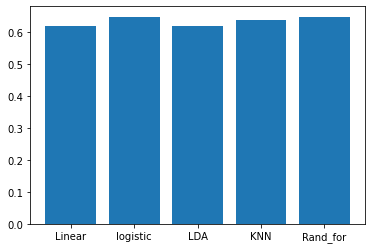

In [67]:
accuracy_data = [0.6176470588235294, 0.6470588235294118, 0.6176470588235294, 0.6372549019607843, 0.6470588235294118]
model = ['Linear', 'logistic', 'LDA', 'KNN', 'Rand_for']
plt.bar(model, accuracy_data)
plt.show()

### Conclusion
In this dataset the highest accuracy score achieved by the models is 0.6470588235294118 which could not be further improved.
The most accurate models for this dataset are logistic regression and random forest classifier.
##### Why KNN could not perform better
The second most accurate model is KNN classifer. It is not suitable for higher dimensional analysis with variables greter than 4 as it becomes difficult to obtain datapoints in higher dimensions and to search for the nearest neighbors the search region must be extended to a large amount which makes this method lousy.
##### Which model of the best two is the better choice
Random forests do provide a very good prediction accuracy but are very difficult to interpret or visualize or to get any inference from. Logistic regression, on the other hand, is a very simple model that is easy to interpret and obtain inferencial data about which predictor is affecting the output the most.
Since, both of these have similar accuracy in this case, the logistic regression is obviously a better choice.
But in some cases the False positive or true negative error is required to be minimized, in such cases decision boundaries can be shifted in logistic regression but if that is not desired then the model whcih has minimum False positive or true negative error rate can be chosen.
Here just the accuracy matters so logistic regression is the best choice 